✅ Data Loaded. Shape: (421570, 21)
🧺 Creating Basket (Pivot Table)...
   ✅ Basket Created. Transactions: 6435, Items (Depts): 81

Sample Basket (Rows=Store+Date, Cols=Dept Sales):


c:\Users\Lenovo\Desktop\Retail_Store\src\market_basket.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.binary_table = self.pivot_table.applymap(lambda x: 1 if x > 0 else 0)


Dept                    1         2         3         4         5        6   \
Store Date                                                                    
1     2010-02-05  24924.50  50605.27  13740.12  39954.04  32229.38  5749.03   
      2010-02-12  46039.49  44682.74  10887.84  35351.21  29620.81  9135.00   
      2010-02-19  41595.55  47928.89  11523.47  36826.95  26468.27  6060.26   
      2010-02-26  19403.54  44292.87  11135.17  34660.16  24101.89  5244.56   
      2010-03-05  21827.90  48397.98  12275.58  38086.19  23082.14  4221.25   

Dept                    7         8         9         10  
Store Date                                                
1     2010-02-05  21084.08  40129.01  16930.99  30721.50  
      2010-02-12  18310.31  37334.83  16562.49  31494.77  
      2010-02-19  19985.20  38717.60  15880.85  29634.13  
      2010-02-26  17224.22  35318.20  15175.52  27921.96  
      2010-03-05  19659.70  38776.09  24064.70  33299.27

🔗 Calculating Sales Correlation...
   Found 878 strong correlations.

🔝 Top Strongly Correlated Department Pairs:
Dept 24 <--> Dept 33 : 0.9747
Dept 90 <--> Dept 92 : 0.9717
Dept 91 <--> Dept 90 : 0.9688
Dept 91 <--> Dept 92 : 0.9653
Dept 81 <--> Dept 92 : 0.9598
Dept 13 <--> Dept 2 : 0.9566
Dept 97 <--> Dept 93 : 0.9533
Dept 81 <--> Dept 90 : 0.9485
Dept 81 <--> Dept 95 : 0.9473
Dept 92 <--> Dept 95 : 0.9439
Dept 91 <--> Dept 81 : 0.9417
Dept 13 <--> Dept 4 : 0.9417
Dept 34 <--> Dept 30 : 0.9395
Dept 23 <--> Dept 29 : 0.9381
Dept 2 <--> Dept 46 : 0.9373
Dept 22 <--> Dept 17 : 0.9367
Dept 14 <--> Dept 22 : 0.9349
Dept 93 <--> Dept 94 : 0.9347
Dept 94 <--> Dept 90 : 0.9330
Dept 20 <--> Dept 74 : 0.9320
Dept 40 <--> Dept 2 : 0.9308
Dept 91 <--> Dept 95 : 0.9303
Dept 93 <--> Dept 90 : 0.9300
Dept 5 <--> Dept 55 : 0.9279
Dept 91 <--> Dept 97 : 0.9266
Dept 80 <--> Dept 98 : 0.9222
Dept 40 <--> Dept 4 : 0.9200
Dept 93 <--> Dept 91 : 0.9195
Dept 98 <--> Dept 90 : 0.9175
Dept 13 <--> Dept 40 :

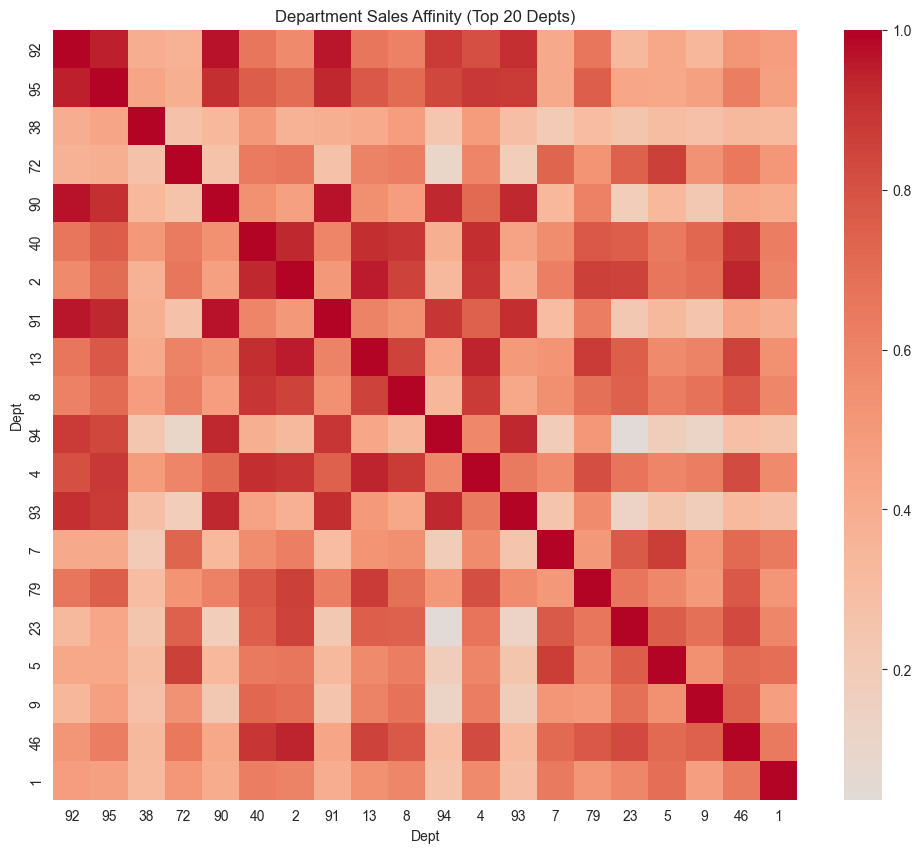

✅ Correlation matrix saved to: ../data/processed/dept_correlation_matrix.csv


In [1]:
# %% [markdown]
# # 🛒 Step 6: Market Basket Analysis
# **Project:** Integrated Retail Analytics
#
# **Objective:**
# To identify relationships between Departments.
# * **Question:** If a customer buys from Dept 1 (e.g., Candy), are they likely to buy from Dept 2 (e.g., Sodas)?
# * **Method:** Since we lack individual receipt data, we analyze **Sales Correlation** across stores and dates.
#
# **Definitions:**
# * **Transaction:** One week of sales at one specific store.
# * **Item:** A Department.
# * **Affinity:** Correlation in sales volume.

# %% [markdown]
# ## 1. Setup & Data Loading

# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

# Add src to path
sys.path.append(os.path.abspath('..'))
from src.market_basket import MarketBasketAnalyzer

# Set visual style
sns.set_style("whitegrid")

# Load Clean Data
data_path = "../data/processed/clean_retail_data.csv"

if not os.path.exists(data_path):
    print("❌ Error: Clean data not found. Run Preprocessing first.")
else:
    df = pd.read_csv(data_path)
    print(f"✅ Data Loaded. Shape: {df.shape}")

# %% [markdown]
# ## 2. Prepare the "Basket"
# We transform the data so that every row represents a Store-Week combination, and columns represent Departments.

# %%
analyzer = MarketBasketAnalyzer(df)
basket = analyzer.create_basket()

print("\nSample Basket (Rows=Store+Date, Cols=Dept Sales):")
display(basket.iloc[:5, :10])

# %% [markdown]
# ## 3. Sales Correlation Analysis
# Which departments tend to rise and fall together?
# * **Positive Correlation:** Complementary goods (e.g., Paint & Brushes).
# * **Negative Correlation:** Substitute goods or Seasonal offsets (e.g., Swimwear vs Winter Coats).

# %%
corr_matrix, strong_pairs = analyzer.analyze_correlation(min_correlation=0.6)

print("\n🔝 Top Strongly Correlated Department Pairs:")
# Deduplicate pairs (A-B is same as B-A) and print
seen = set()
for index, value in strong_pairs.items():
    dept_a, dept_b = index
    pair = tuple(sorted((dept_a, dept_b)))
    if pair not in seen:
        print(f"Dept {dept_a} <--> Dept {dept_b} : {value:.4f}")
        seen.add(pair)

# %% [markdown]
# ## 4. Visualizing Affinity
# Let's visualize the relationships between the highest volume departments.

# %%
analyzer.plot_affinity_heatmap(corr_matrix, top_n=20)

# %% [markdown]
# **Strategic Insight:**
# * If **Dept A** and **Dept B** have high correlation:
#     * **Placement:** Place these departments near each other in the store layout.
#     * **Promotions:** A discount on Dept A drives sales in Dept B (Cross-selling).
# * If correlation is **Negative**:
#     * These might be seasonal opposites. Use the space of one for the other during off-seasons.

# %% [markdown]
# ## 5. Save Analysis
# We can save the correlation matrix to power a recommendation engine later.

# %%
output_path = "../data/processed/dept_correlation_matrix.csv"
corr_matrix.to_csv(output_path)
print(f"✅ Correlation matrix saved to: {output_path}")